# What makes the world happy?

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [14]:
data_list = ['2015.csv','2016.csv','2017.csv']
dataframes = []
l=[]
for name in data_list:
    dataframes.append(pd.read_csv('data/'+name).dropna())
    
cols = ['hapiness','gdp','social_factor','life_expectancy','freedom','corruption','generocity','country']
dataframes[0] = dataframes[0][['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
                             'Freedom','Trust (Government Corruption)','Generosity','Country']]
dataframes[0].columns = cols
dataframes[0]["year"] = '2015'
dataframes[1] = dataframes[1][['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
                             'Freedom','Trust (Government Corruption)','Generosity','Country']]
dataframes[1].columns = cols
dataframes[1]["year"]='2016'
dataframes[2] = dataframes[2][['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.',
                               'Freedom','Trust..Government.Corruption.','Generosity','Country']]
dataframes[2].columns = cols
dataframes[2]["year"]='2017'

In [15]:
data=pd.concat([i for i in dataframes])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hapiness         470 non-null    float64
 1   gdp              470 non-null    float64
 2   social_factor    470 non-null    float64
 3   life_expectancy  470 non-null    float64
 4   freedom          470 non-null    float64
 5   corruption       470 non-null    float64
 6   generocity       470 non-null    float64
 7   country          470 non-null    object 
 8   year             470 non-null    object 
dtypes: float64(7), object(2)
memory usage: 36.7+ KB


In [17]:
data.describe()

,hapiness,gdp,social_factor,life_expectancy,freedom,corruption,generocity
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241
std,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831
50%,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140
75%,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824
max,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075


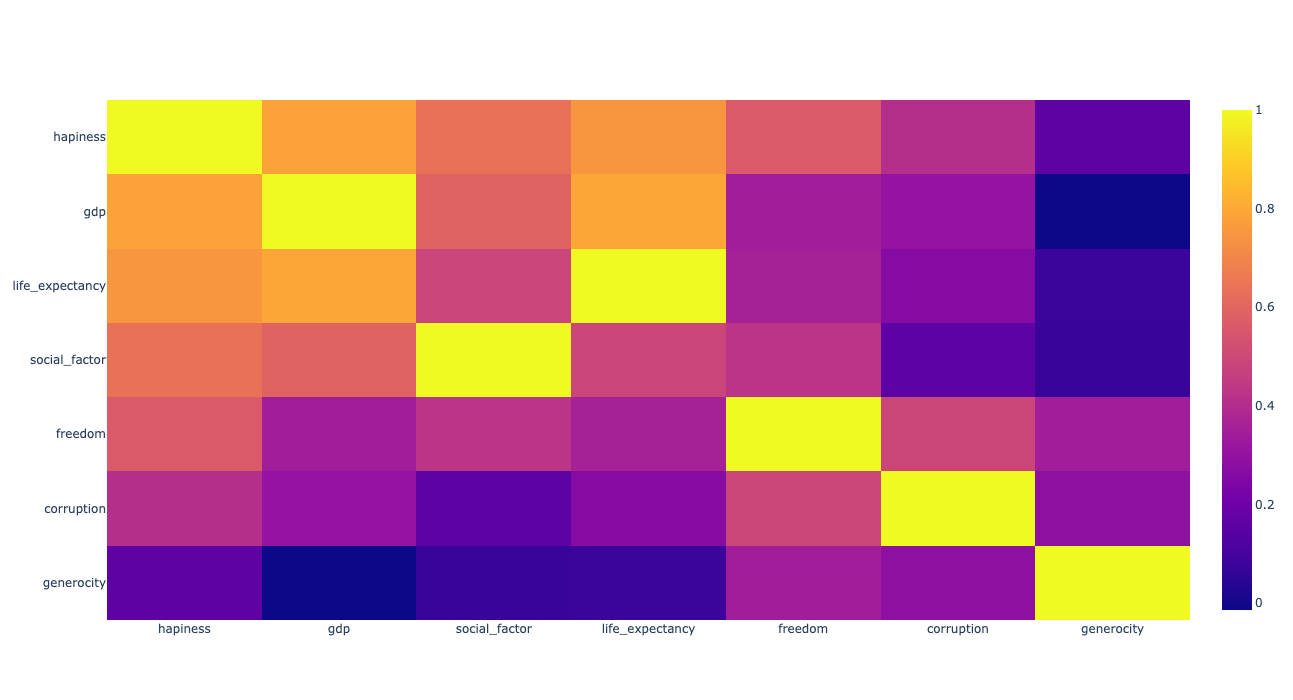

In [18]:
corr_df = data.corr()
corr_df = corr_df.sort_values(by="hapiness")
fig = go.Figure(data=go.Heatmap(
                   z=corr_df.values,
                   x=corr_df.columns,
                   y=corr_df.index,
                   hoverongaps = False))
fig.update_layout(
height=700,
    
)

fig.show()

In [21]:
data[list(set(data.columns))].head()

,generocity,corruption,freedom,social_factor,gdp,country,year,life_expectancy,hapiness
0,0.29678,0.41978,0.66557,1.34951,1.39651,Switzerland,2015,0.94143,7.587
1,0.43630,0.14145,0.62877,1.40223,1.30232,Iceland,2015,0.94784,7.561
2,0.34139,0.48357,0.64938,1.36058,1.32548,Denmark,2015,0.87464,7.527
3,0.34699,0.36503,0.66973,1.33095,1.45900,Norway,2015,0.88521,7.522
4,0.45811,0.32957,0.63297,1.32261,1.32629,Canada,2015,0.90563,7.427


## creating the dashboard havig the following charts

1. scatter plot of hapiness against all other fields
2. line plot of hapiness agaist the rest
3. map of hapiness.
5. countries and continents that have had the most increase of hapiness.
6. pie charts of hapiness per year.
7. bar chart of hapiness  per continent.
7. heat map pf all the features

checkout the dashboard hosted in :

In [23]:
data[list(set(data.columns))].to_csv('data/combined_clean_data.csv',index=False)